# Formation flight

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE786: Optimization applications, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_


You are operating a team of $K$ identical drones; one leader and $K-1$ follower drones, for which you are trying to design optimal formation flight trajectories.

Vehicle $k$'s dynamical behaviour in horizontal plane can be described by
$$
\begin{aligned}
  x^{(k)}_{t+1} &= Ax^{(k)}_t + Bu^{(k)}_t 
\end{aligned}
$$
where the state vector $x^{(k)}_t \in \R^4$ consists of two positions ($p^{(k)}_t\in\R^2$) and two velocities ($v^{(k)}_t\in\R^2$). The vehicle's control $u^{(k)}_t\in\R^2$ is acceleration control for the two axes. Then the following matrices describe the above dynamics. 
$$
A = \bmat{
1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t & 0 \\
0 & 1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t \\
0 & 0 & 1-\gamma\Delta t & 0 \\
0 & 0 & 0 & 1-\gamma\Delta t
} \\
B = \bmat{
0.5\Delta t^2 & 0 \\
0 & 0.5\Delta t^2 \\
\Delta t & 0 \\
0 & \Delta t
} 
$$

We consider $t\in \{0,\dots,N-1\}$ with $N=1000$ and $\Delta t=0.05$, and we further assume that all the vehicles are (dynamically) identical, that is, they have the same $A$ and $B$. 



In [ ]:
import numpy as np

n = 1000 # number of timesteps
T = 50 # time will vary from 0 to T with step delt
ts = np.linspace(0,T,n+1)
delt = T/n
gamma = .05 # damping, 0 is no damping

A = np.zeros((4,4))
B = np.zeros((4,2))

A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt

We assume that the vehicles are initially at random position with random velocity. You can assume that the random variables are normally distributed.

In [ ]:
K = 6      # 6 drones

np.random.seed(786)

p_0 = np.random.randn(2,K)*2    # initial positions
v_0 = np.random.randn(2,K)      # initial velocities

You are required to find the minimum energy formation trajectory that achieves the following formation at $t=N$.

- The position of the followers are defined relative to the leader. For example, equispaced circular formation around the leader can be speficied as follows.
$$
  p^{(k)}_N = p^{(1)}_N + r_\text{formation}\bmat{\sin\frac{2\pi (k-1)}{(K-1)} \\ \cos\frac{2\pi (k-1)}{(K-1)} }
$$
- The velocity of the followers (vehicle $2,\dots,K$) should be equal to the leader's velocity ($v^{(k)}_N = v^{(1)}_N$ for $k=2,\dots,K$). 
- The leader (vehicle $1$) has the predefined final velocity ($v^{(1)}_N = v_f\in\R^2$).


Note that the leader's final position, $p^{(1)}_N$ is unconstrained.

Find the optimal formation flight trajectory by solving
$$
\begin{aligned}
  \underset{u^{(1)}_0,\dots,u^{(1)}_{N-1},\dots,u^{(K)}_0,\dots,u^{(K)}_{N-1}}{\minimize} \quad & \sum_{k=1}^K\sum_{t=0}^{N-1} \|u^{(k)}_t\|^2 
\end{aligned}
$$
under the prementioned formation flight constraints.

In [ ]:
v_f = [1, 1]       # desired final velocity of the leader
r_formation = 1    # the radius of the formation circle

풀이1: 


시간 $t$에서 $k$번째 드론의 위치를 $p^{(k)}_t$라고 할 때, 드론의 위치를 상태변수 $x^{(k)}_t$로부터 뽑아내는 행렬 $C$를 다음과 같이 설정한다.
$$
$$
$$
C = \begin{bmatrix} 1&0&0&0  \\ 0&1&0&0
\end{bmatrix}
$$
$$
$$
마찬가지로 시간 $t$에서 $k$번째 드론의 상태변수 $x^{(k)}_t$로부터 속도에 대한 변수 $v^{(k)}_t$를 만드는 행렬 $D$를 만들어낼 수 있다.
$$
$$
$$
D = \begin{bmatrix} 0&0&1&0  \\ 0&0&0&1
\end{bmatrix}
$$
$$
$$
이 문제의 동역학을 $x_t=\begin{bmatrix}{x^{(1)}_t}^T&{x^{(2)}_t}^T&\dots&{x^{(K)}_t}^T\end{bmatrix}$와 $u_t=\begin{bmatrix}{u^{(1)}_t}^T&{u^{(2)}_t}^T&\dots&{u^{(K)}_t}^T\end{bmatrix}$에 대해서 다시 기술해야 한다. 이 때, 리더 드론을 제외한 나머지 드론의 위치에 대해서 식을 다음과 같이 구성할 수 있다.
$$
$$
$$
p^{(2, \dots, K)}_{t+1} = \underbrace{\begin{bmatrix}0&C&\\\ &&C\\ &&&\ddots\\ &&&&C\end{bmatrix}}_{\tilde{C}} \underbrace{\begin{bmatrix}A&\\\ &A\\ &&\ddots\\ &&&A\end{bmatrix}}_{\tilde{A}}x_t + \underbrace{\begin{bmatrix}0&C&\\\ &&C\\ &&&\ddots\\ &&&&C\end{bmatrix}}_{\tilde{C}}\underbrace{\begin{bmatrix}B&\\\ &B\\ &&\ddots\\ &&&B\end{bmatrix}}_{\tilde{B}}u_t
$$
$$
$$

마찬가지로 리더 드론에 대해서 다음 식을 구성할 수 있다.

$$
$$
$$
p^{(1)}_{t+1} = \underbrace{\begin{bmatrix}C&&&\dots&0\\\ C&&&\dots&0\\ \vdots\\ C&&&\dots&0\end{bmatrix}}_{L} \underbrace{\begin{bmatrix}A&\\\ &A\\ &&\ddots\\ &&&A\end{bmatrix}}_{\tilde{A}}x_t + \underbrace{\begin{bmatrix}C&&&\dots&0\\\ C&&&\dots&0\\ \vdots\\ C&&&\dots&0\end{bmatrix}}_{L}\underbrace{\begin{bmatrix}B&\\\ &B\\ &&\ddots\\ &&&B\end{bmatrix}}_{\tilde{B}}u_t
$$
$$
$$

$U=\begin{bmatrix}u^T_0&u^T_1&\dots&u^T_{N-1}\end{bmatrix}$일 때, minimum energy control 문제에 따라서 같은 방식으로 문제를 구성하면,

$$
$$
$$
p^{(2, \dots, K)}_{N}=\tilde{C}{\tilde{A}}^Nx_0+\tilde{C}GU
$$
$$
p^{(1)}_N=L{\tilde{A}}^Nx_0+LGU
$$
$$
$$

상대 위치를 고려하기 위하여, 리더 드론을 제외한 나머지 드론의 위치 벡터를 리더 드론의 위치벡터로 빼주면 다음과 같은 식이 성립한다.
$$
$$
$$
(\tilde{C}-L)GU=p_{\text{des}}^{(2, \dots, K)}-(\tilde{C}-L){\tilde{A}}^Nx_0   \quad\quad\quad \dots\enspace(1)
$$

여기서, 

$$
p_{\text{des}}^{(2, \dots, K)} =  r_\text{formation}\bmat{\sin\frac{2\pi }{(K-1)} \\ \cos\frac{2\pi}{(K-1)}
\\\vdots\\ 0 \\ 1}, \quad \quad G=\begin{bmatrix}\tilde{A}^{N-1}\tilde{B}&\dots&\tilde{A}\tilde{B}&\tilde{B}\end{bmatrix}
$$
이다.

$$
$$
같은 방식으로 속도에 대해서도 식을 구성할 수 있다. 다만, 속도의 경우는 리더 드론과 나머지 드론의 속도 차이를 고려하여 구성할 필요는 없다. 따라서,

$$
$$
$$
\tilde{D}GU=v_{\text{des}}-\tilde{D}{\tilde{A}}^Nx_0   \quad\quad\quad \dots\enspace(2)
$$
여기서, 

$$
v_{\text{des}}=\begin{bmatrix}1\\1\\\vdots\\1\end{bmatrix} , \quad\quad\tilde{D}=\text{diag}(D, \dots, D) 
$$
가 된다.

$$
$$
따라서, 전체 문제는 식 (1)과 (2)에 따라 아래와 같이 구성된다.
$$
$$
$$
\begin{aligned}
  \underset{U}{\minimize} \quad & \|U\|^2 \\
  \text{subject to} \quad & WU = V
\end{aligned}
$$
여기서,
$$
W=\begin{bmatrix}(\tilde{C}-L)G\\\tilde{D}G\end{bmatrix}, \quad\quad V=\begin{bmatrix}p_{\text{des}}^{(2, \dots, K)}-(\tilde{C}-L){\tilde{A}}^Nx_0 \\v_{\text{des}}-\tilde{D}{\tilde{A}}^Nx_0\end{bmatrix}
$$
이다.

In [ ]:
import math
import scipy as sp
from numpy.linalg import matrix_power

# Matrix Formulation
A_tilde = np.hstack((A, np.zeros((len(A), len(A[0])*(K-1)))))
B_tilde = np.hstack((B, np.zeros((len(B), len(B[0])*(K-1)))))

for k in range(1, K):
  A_line = np.hstack((np.zeros((len(A), len(A[0])*k)), A, np.zeros((len(A), len(A[0])*(K-k-1)))))
  B_line = np.hstack((np.zeros((len(B), len(B[0])*k)), B, np.zeros((len(B), len(B[0])*(K-k-1)))))
  
  A_tilde = np.vstack((A_tilde, A_line))
  B_tilde = np.vstack((B_tilde, B_line))

# Selection for position of a drone
C = np.zeros((2, 4))
C[0, 0] = 1
C[1, 1] = 1     

# Selection for velocity of a drone
D = np.zeros((2, 4))
D[0, 2] = 1
D[1, 3] = 1

C_tilde = np.hstack((C, np.zeros((len(C), len(C[0])*(K-1)))))  # Selection matrix for position of drones
D_tilde = np.hstack((D, np.zeros((len(D), len(D[0])*(K-1)))))  # Selection matrix for velocity of drones
for k in range(1, K):
  C_line = np.hstack((np.zeros((len(C), len(C[0])*k)), C, np.zeros((len(C), len(C[0])*(K-k-1)))))
  D_line = np.hstack((np.zeros((len(D), len(D[0])*k)), D, np.zeros((len(D), len(D[0])*(K-k-1)))))
  
  C_tilde = np.vstack((C_tilde, C_line))
  D_tilde = np.vstack((D_tilde, D_line))
C_tilde = C_tilde[2:, :]

# Selection matrix for the final position of the leader drone
L_line = np.hstack((C, np.zeros((len(C), len(C[0])*(K-1)))))
L = np.tile(L_line, (K-1, 1))

G = B_tilde
for i in range(1, n):
  G = np.hstack((matrix_power(A_tilde, i)@B_tilde, G))
  

In [ ]:
# Set initial conditions 
x0 = np.vstack((p_0[:, 0].reshape(2, 1), v_0[:, 0].reshape(2, 1)))
for k in range(1, K):
  x0_k = np.vstack((p_0[:, k].reshape(2, 1), v_0[:, k].reshape(2, 1)))
  x0 = np.vstack((x0, x0_k))
  
# Set desired positions
def setpos(k, K):
  result = np.zeros((2, 1))
  result[0, 0] = r_formation * math.sin(2*math.pi*(k-1)/(K-1)) 
  result[1, 0] = r_formation * math.cos(2*math.pi*(k-1)/(K-1)) 
  return result
  
# Set desired conditions
p_des = setpos(2, K)
for k in range(2, K):
  p_des = np.vstack((p_des, setpos(k+1, K)))
  
v_des = np.ones((2*K, 1))

In [ ]:
# Solve the problem
W = np.vstack(((C_tilde-L)@G, D_tilde@G))
V = np.vstack((p_des - (C_tilde-L)@matrix_power(A_tilde, n)@x0, v_des - D_tilde@matrix_power(A_tilde, n)@x0))
u_hat = np.linalg.lstsq(W, V, rcond=None)[0]
u_opt = u_hat.reshape(1000, 12)


In [ ]:
# Extract the location of drones
x = np.zeros((4*K,n+1))
x[:, 0] = x0.flatten()

for k in range(K):
  for t in range(n):
    x[4*k:4*(k+1),t+1] = A@x[4*k:4*(k+1), t] + B@u_opt[t, 2*k:2*(k+1)]

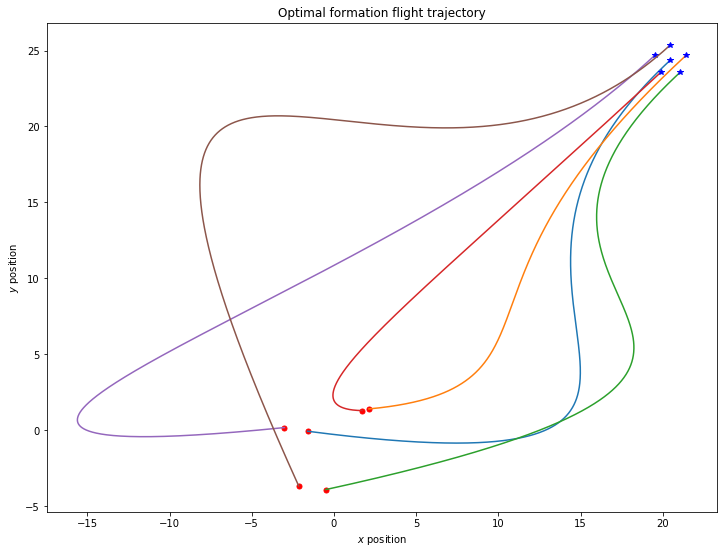

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
for k in range(K):
  plt.plot(x[4*k, 0], x[4*k+1, 0], marker='.', color = 'red', markersize=10)
  plt.plot(x[4*k, :], x[4*k+1, :])
  plt.plot(x[4*k, -1], x[4*k+1, -1], marker='*', color = 'blue')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.title('Optimal formation flight trajectory')
plt.show()


풀이2:

첫번째 방법처럼 위치와 속도를 따로 분리하지 않고,   $\enspace x_t=\begin{bmatrix}{x^{(1)}_t}^T&{x^{(2)}_t}^T&\dots&{x^{(K)}_t}^T\end{bmatrix}$ 에 대하여 selection matrix를 구성하는 방법도 있다.

이때의 selection matrix $ S$는 아래와 같다.
$$
$$
$$
S=\begin{bmatrix}-C&C\\-C&0&C\\&&&\ddots\\-C&0&\dots&&C\\D\\&D\\&&D\\&&&\ddots\\&&&&D\end{bmatrix}
$$
$$
$$

따라서, 동역학은 $y_{t+1}=Sx_{t+1}=S\tilde{A}x_t+S\tilde{B}u_t$가 된다. 그리고 마찬가지로 minimum energy control에서 썻던 방법을 사용하여 아래와 같은 문제를 풀게 된다.

$$
$$
$$
\begin{aligned}
  \underset{U}{\minimize} \quad & \|U\|^2 \\
  \text{subject to} \quad & QU = P
\end{aligned}
$$

여기서,
$$
Q=SG, \quad\quad P=x_{\text{des}}-S\tilde{A}^Nx_0, \quad\quad x_{\text{des}}=\begin{bmatrix}p_{\text{des}}^{(2, \dots, K)}\\v_{\text{des}}\end{bmatrix}
$$
가 된다.

In [ ]:
# Selection Matrix
S = np.hstack((-C, C, np.zeros((len(C), len(C[0])*(K-2)))))
for k in range(1, K-1):
  S_line = np.hstack((-C, np.zeros((len(C), len(C[0])*k)), C, np.zeros((len(C), len(C[0])*(K-k-2)))))
  S = np.vstack((S, S_line))
S = np.vstack((S, np.hstack((D, np.zeros((len(D), len(D[0])*(K-1)))))))
for k in range(1, K):
  S_line = np.hstack((np.zeros((len(D), len(D[0])*k)), D, np.zeros((len(D), len(D[0])*(K-k-1)))))
  S = np.vstack((S, S_line))
  
# Set desired condition
x_des = np.vstack((p_des, v_des))

# Solve the problem
Q = S@G
P = x_des - S@matrix_power(A_tilde, n)@x0
us_hat = np.linalg.lstsq(Q, P, rcond=None)[0]
us_opt = us_hat.reshape(1000, 12)

In [ ]:
# Extract the location of drones
xs = np.zeros((4*K,n+1))
xs[:, 0] = x0.flatten()

for k in range(K):
  for t in range(n):
    xs[4*k:4*(k+1),t+1] = A@xs[4*k:4*(k+1), t] + B@us_opt[t, 2*k:2*(k+1)]

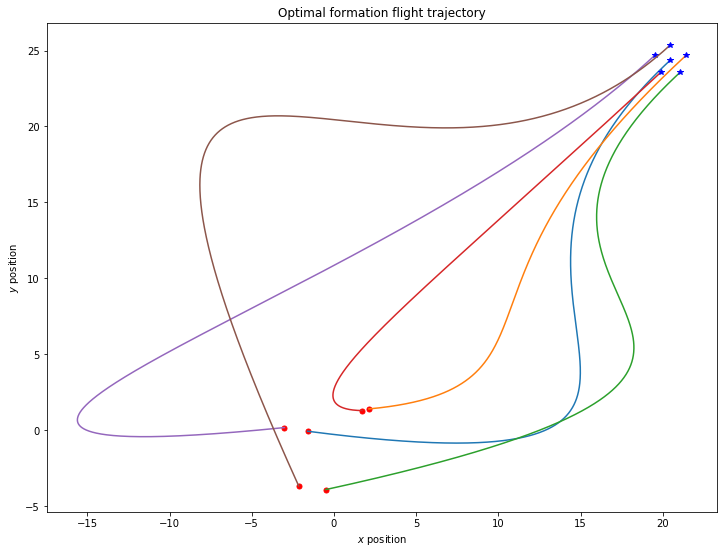

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
for k in range(K):
  plt.plot(xs[4*k, 0], xs[4*k+1, 0], marker='.', color = 'red', markersize=10)
  plt.plot(xs[4*k, :], xs[4*k+1, :])
  plt.plot(xs[4*k, -1], xs[4*k+1, -1], marker='*', color = 'blue')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.title('Optimal formation flight trajectory')
plt.show()

첫번째 풀이와 같은 결과가 나오는 것을 확인할 수 있다.

You result should look something like...

<center>
<img src="https://jonghank.github.io/ee786/files/formation_flight_6.png" width="600">
</center>

or, 

<center>
<img src="https://jonghank.github.io/ee786/files/formation_flight_37.png" width="600">
</center>
